In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

In [15]:
# Load Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [16]:
# Encode class labels for plotting
le = LabelEncoder()
y_encoded = le.fit_transform(dataset['class'])

In [17]:
# Remove class labels for clustering
X = dataset.iloc[:, :-1].values

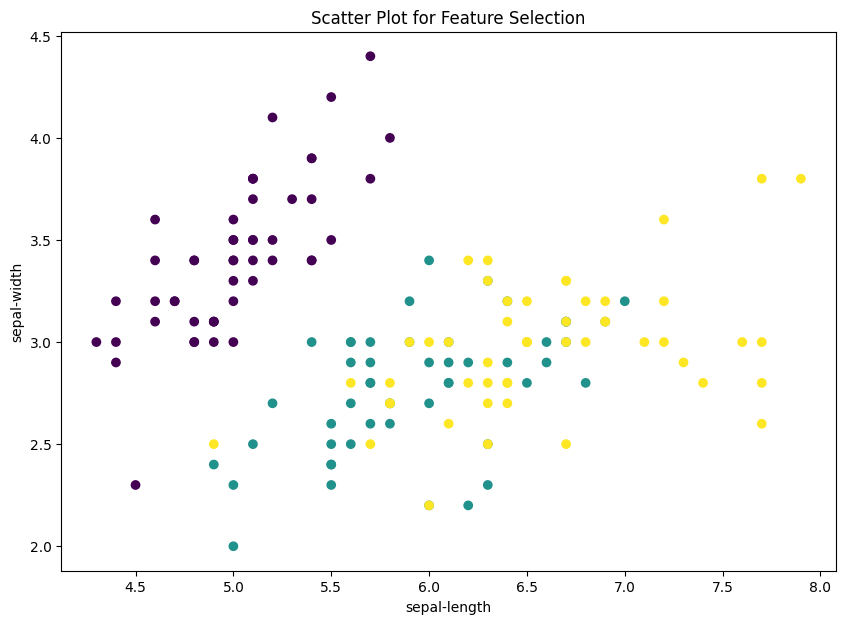

In [ ]:
# Scatter plot for feature selection
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_encoded, cmap='viridis')
plt.xlabel(names[0])
plt.ylabel(names[1])
plt.title('Scatter Plot for Feature Selection')
plt.show()

<ipython-input-7-1c62a1e8c08e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(dataset.corr(), fignum=1)


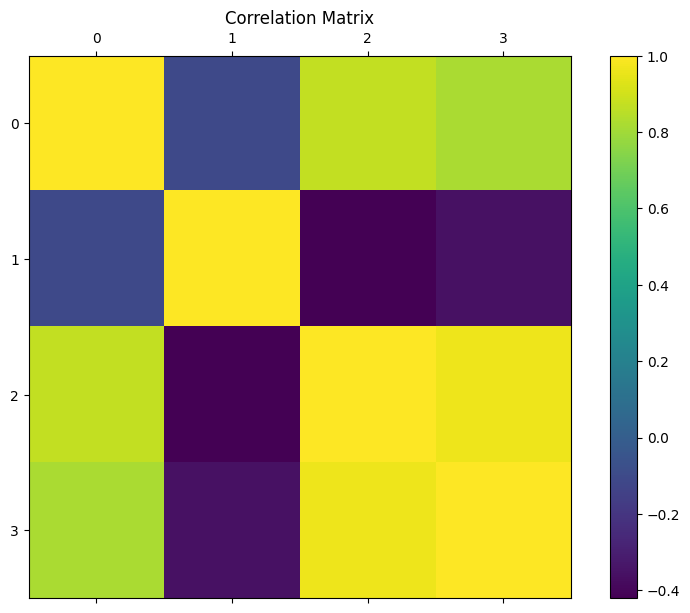

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 7))
plt.matshow(dataset.corr(), fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

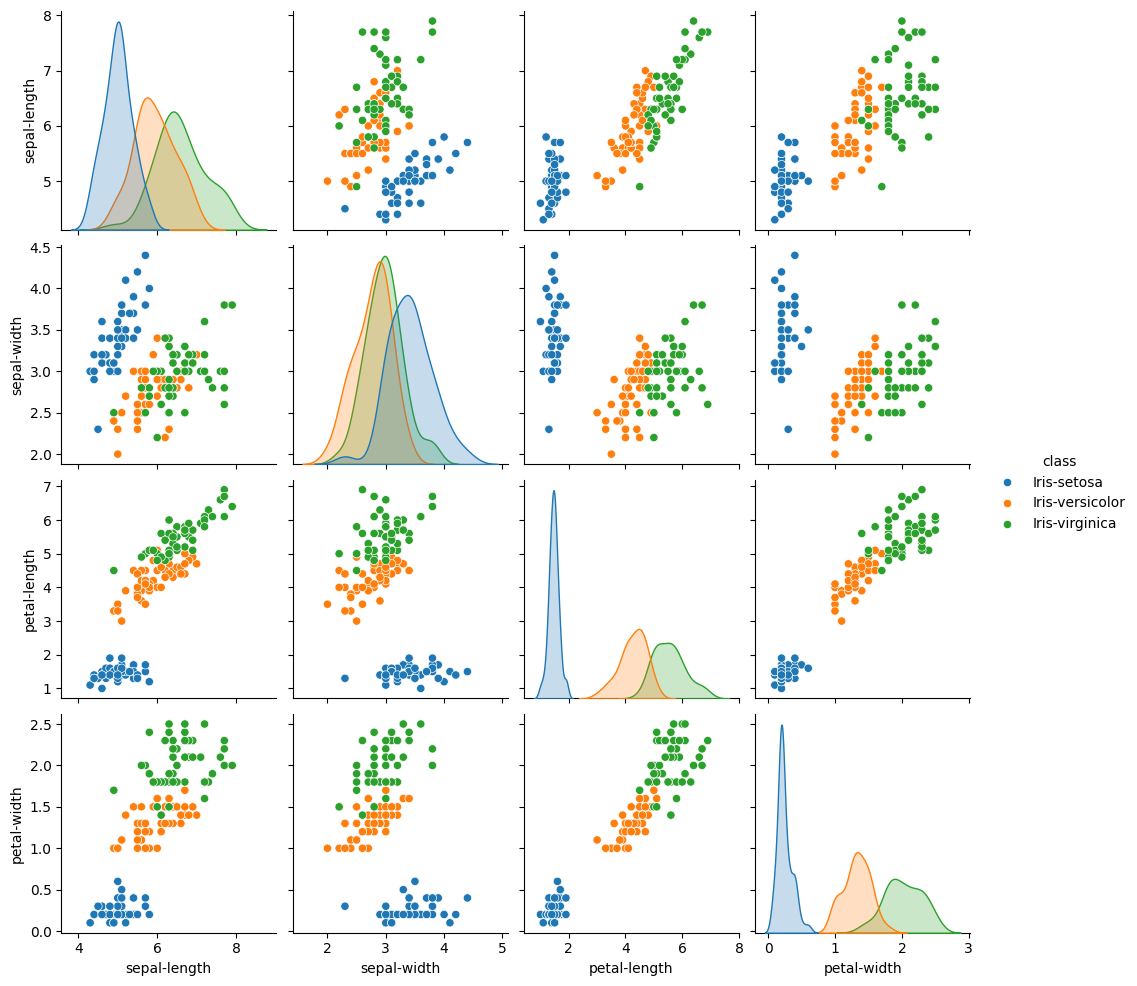

In [ ]:
# Pair plot among all attributes
sns.pairplot(dataset, hue='class')
plt.show()

In [ ]:
# Based on the scatter plot and correlation matrix, we can visually inspect the data and select features.
selected_features = [0, 1]

In [ ]:
# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X[:, selected_features])
labels_pred = kmeans.labels_
print("Silhouette Score for K-means: %f" % silhouette_score(X[:, selected_features], labels_pred))

Silhouette Score for K-means: 0.443469


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


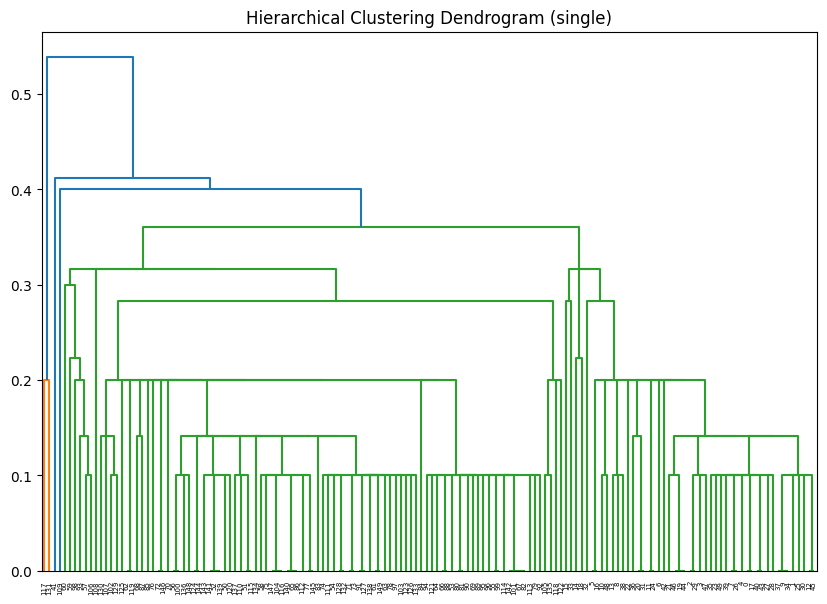

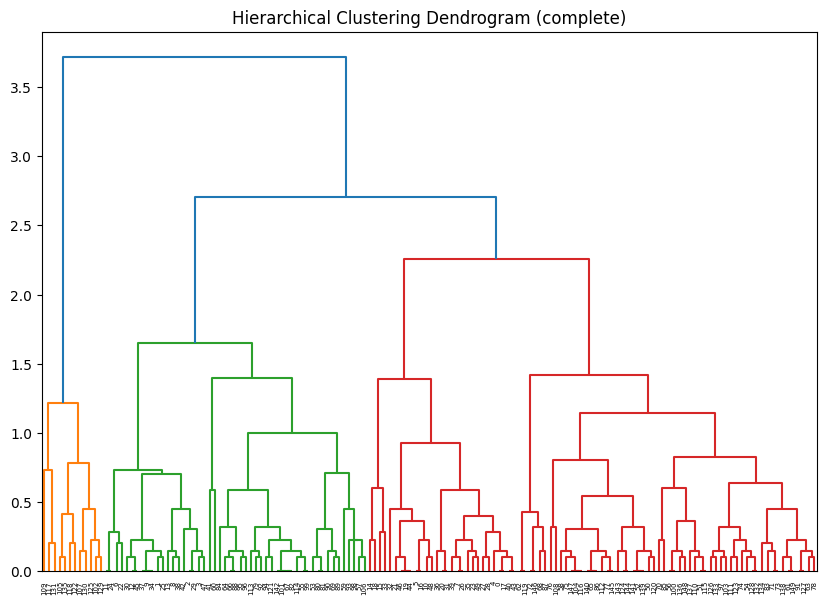

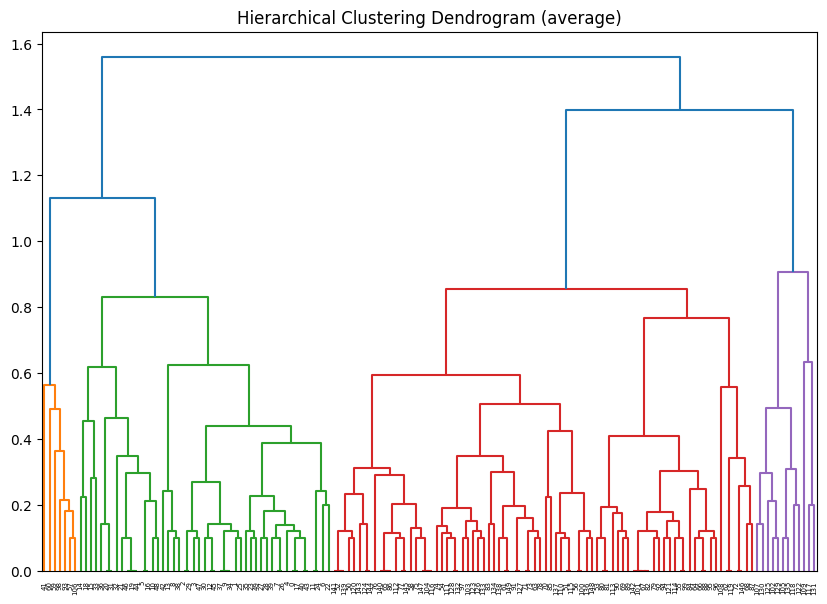

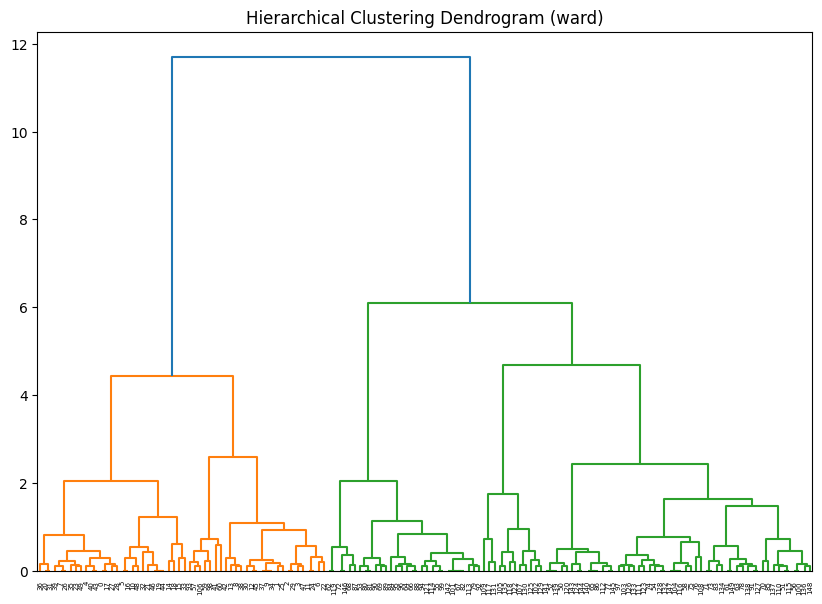

In [ ]:
# Hierarchical Clustering
linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    Z = linkage(X[:, selected_features], method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(Z, leaf_rotation=90)
    plt.title(f'Hierarchical Clustering Dendrogram ({method})')
    plt.show()

In [ ]:
''' Conclusion:
Based on the results, we can draw conclusions about the effectiveness of k-means and hierarchical clustering methods for the Iris dataset,
with respect to the selected properties. Silhouette scores for k-means clustering and visual inspection of hierarchical clustering
dendrograms can provide insight into the structure of the data and the suitability of each clustering method. further analysis,
such as silhouette scores or other evaluation metrics could provide additional insight into the quality of the clustering solution.'''

' Conclusion:\nBased on the results, we can draw conclusions about the effectiveness of k-means and hierarchical clustering methods for the Iris dataset,\nwith respect to the selected properties. Silhouette scores for k-means clustering and visual inspection of hierarchical clustering\ndendrograms can provide insight into the structure of the data and the suitability of each clustering method. further analysis,\nsuch as silhouette scores or other evaluation metrics could provide additional insight into the quality of the clustering solution.'